Grupo 5

María Paulina Arias CC 1193085377

Andrea Espinosa Villadiego CC 1003399277

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import pingouin as pg

In [ ]:
data = scipy.io.loadmat('/content/drive/MyDrive/Signals/signals.mat') #Carga de datos
data.keys() #Obtención de las llaves

#Se confirma que ambos datasets tienen el mismo tamaño
asRecording = np.transpose(data['ECG_asRecording'])
filtered = np.transpose(data['ECG_filtered'])


1. Implementación de funciones: RMS en forma discreta

In [ ]:
def rms(vect):
    v = np.arange(0, len(vect))  # Índices del vector
    z = []
    for i in v:
        z.append(vect[i]**2)  # Eleva al cuadrado cada elemento del vector
    return np.sqrt(np.sum(z) / len(vect))  # Raíz cuadrada de la media de los cuadrados

vect = [2,4,2]
resultado = rms(vect)
print(resultado)

2.8284271247461903


**Análisis estadístico de ECG**

In [ ]:
fs = 1024 #Hz
Tm = 1/fs #s
tiempo = np.arange(0,len(asRecording)*Tm,Tm)

**Graficación señal sin filtrar**

Text(0.5, 1.0, 'Señal cruda')

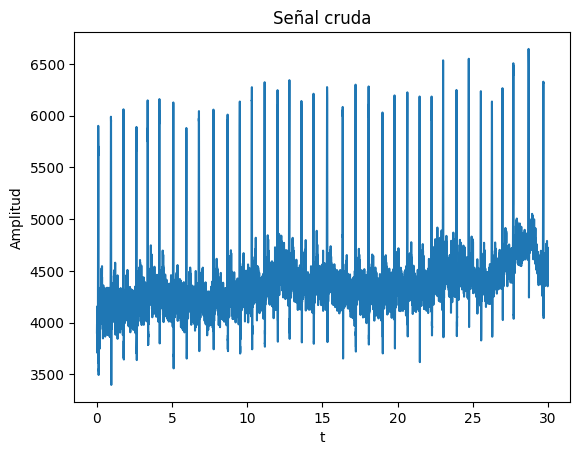

In [ ]:
plt.plot(tiempo,asRecording)
plt.xlabel("t")
plt.ylabel("Amplitud")
plt.title("Señal cruda")

**Graficación señal filtrada**

Text(0.5, 1.0, 'Señal filtrada')

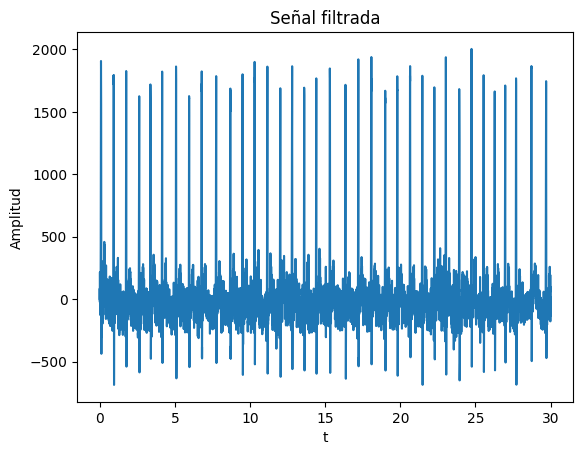

In [ ]:
plt.plot(tiempo,filtered)
plt.xlabel("t")
plt.ylabel("Amplitud")
plt.title("Señal filtrada")

Se aplicó un offset a la señal cruda tal que la señal filtrada se centralizada en la amplitud 0. Además, se observa la aplicación de un *detrending lineal*, ya que la señal filtrada, eliminado tendencias lineales de la señal para centrarse en las fulctuaciones signficativas alrededor de la media 0.

**Graficación de un ciclo cardiaco de la señal tal cual se registró (cruda)**

Cálculo del promedio, varianza, valor RMS y desviación estándar del ciclo.

Varianza:  103503.2824314821
RMS:  4392.9682937490725
Promedio:  4381.171892023087
Desviación estándar:  321.7192602743611


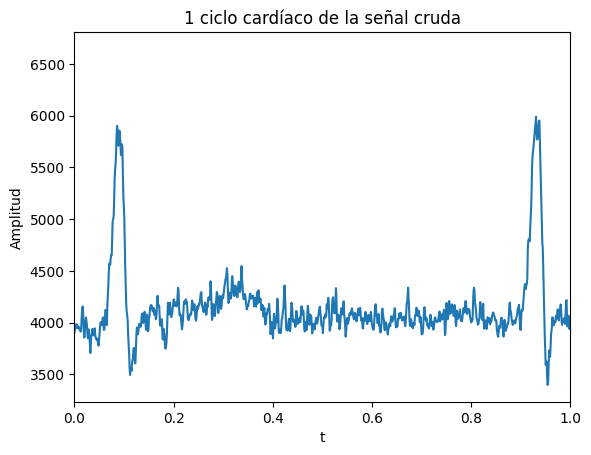

In [ ]:
plt.plot(tiempo,asRecording)
plt.xlim([0,1])
plt.xlabel("t")
plt.ylabel("Amplitud")
plt.title("1 ciclo cardíaco de la señal cruda")
print("Varianza: ", np.var(asRecording))
print("RMS: ", rms(asRecording))
print("Promedio: ", np.mean(asRecording))
print("Desviación estándar: ", np.std(asRecording))

**Graficación de un ciclo cardiaco de la señal filtrada.**

Cálculo del promedio, varianza, valor RMS y desviación estándar del ciclo.

Text(0.5, 1.0, '1 ciclo cardíaco de la señal filtrada')

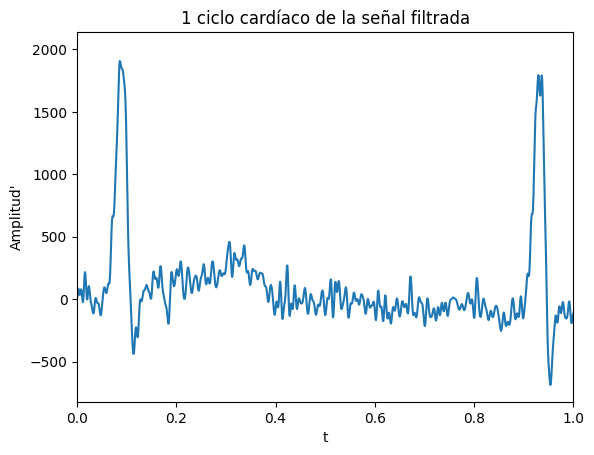

In [ ]:
plt.plot(tiempo,filtered)
plt.xlim([0,1])
plt.xlabel("t")
plt.ylabel("Amplitud'")
plt.title("1 ciclo cardíaco de la señal filtrada")



Comparación entre los resultados obtenidos (promedio, varianza, valor RMS y desviación estándar) entre la señal filtrada y cruda

**15 ciclos de la señal filtrada (promedio y varianza de cada ciclo)**

Comparación gráfica y estadística ¿Se considera una señal estacionaria?